# Projet 3
# Concevez une application au service de la santé publique

## Problématique

Appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation.
   - Problématique à se fixer en fonction des objectifs visés

## Missions

- Traiter le jeu de données afin de repérer des variables pertinentes pour les traitements à venir.
- Automatiser ces traitements pour éviter de répéter ces opérations.
- Produire des visualisations afin de mieux comprendre les données. 
- Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement.
- Confirmer ou infirmer les hypothèses  à l’aide d’une analyse multivariée. 
- Effectuer les tests statistiques appropriés pour vérifier la significativité des résultats.
- Élaborer une idée d’application. 
- Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.
- Rédiger un rapport d’exploration et pitcher votre idée durant la soutenance du projet.

## Compétences évaluées

- Communiquer ses résultats à l’aide de représentations graphiques lisibles et pertinentes
- Effectuer une analyse statistique univariée
- Effectuer des opérations de nettoyage sur des données structurées
- Effectuer une analyse statistique multivariée

## Hypothèse de départ pour l'application

Ellaborer une application qui permet de dire si oui ou non l'aliment scanner par un utilisateur contient des allergènes ou s'il est convenable pour un utilisateur suivant un régime spécial (par exemple les diabétiques) afin de lui recommander des produits alternatifs.


In [350]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

plt.rcParams["figure.figsize"]=20,20
sns.set_style("white")

In [351]:
data = pd.read_csv('data_03.csv',sep='\t',encoding="utf-8",low_memory=False)

columns = ['pnns_groups_1','pnns_groups_2','additives_n','nutriscore_score','energy_100g','fat_100g',
           'saturated-fat_100g','carbohydrates_100g','sugars_100g','proteins_100g','salt_100g','sodium_100g']
data = data.dropna(how='any', subset=columns)
data.head()

,Unnamed: 0,creator,created_t,last_modified_t,product_name,labels_en,countries_en,allergens,additives_n,additives_tags,nutriscore_score,nutriscore_grade,pnns_groups_1,pnns_groups_2,main_category_en,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,soluble-fiber_100g,insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,699243,kiliweb,1518620092,1587844229,jus pomme cerise,NaN,France,NaN,0.0,NaN,5.0,c,Beverages,Unsweetened beverages,Beverages,NaN,192.0,192.0,NaN,0.04,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.1,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2,NaN,NaN,0.2,NaN,NaN,NaN,0.00,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1004703,kiliweb,1510174887,1582759325,& sully a mild thai chicken soup,"Gluten free, Non vegetarian","Belgium, France","Celery, Milk",0.0,NaN,3.0,c,Composite foods,One dish meals,Soups,NaN,285.0,285.0,NaN,3.70,2.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.3,1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN,3.1,NaN,NaN,NaN,0.50,0.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,607181,kiliweb,1566034614,1580111328,(lot de 2) chips saveur poulet braisé,NaN,France,NaN,0.0,NaN,15.0,d,Salty snacks,Appetizers,Potato crisps in sunflower oil,NaN,2259.0,2259.0,NaN,34.00,3.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,1.40,0.560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,980186,kiliweb,150891

In [352]:
data.shape

(15560, 126)

Je représente ici les proportions par catégorie de produit sur un diagramme circulaire à partir de l'échantillon de travail.

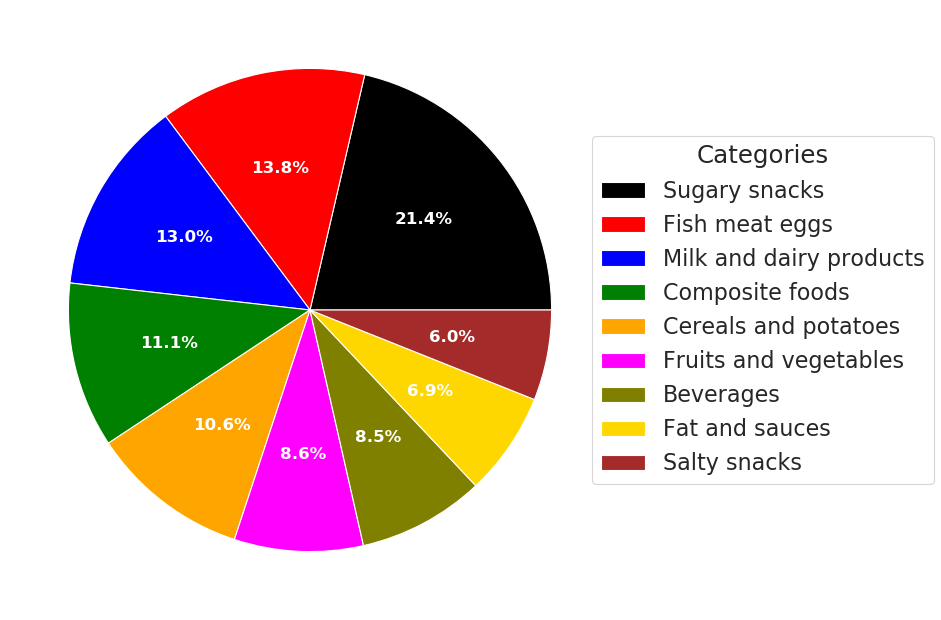

In [353]:
fig,ax = plt.subplots(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)

colors = ['black', 'red', 'blue', 'green', 'orange','fuchsia','olive','gold','brown']

wedges, texts, autotexts = ax.pie(data['pnns_groups_1'].value_counts(),
                                   autopct=lambda pct: func(pct, data['pnns_groups_1'].value_counts())
                                   ,colors=colors,textprops=dict(color="w"))

ax.legend(wedges, data['pnns_groups_1'].value_counts().index,
          title="Categories",
          title_fontsize=22,
          loc="center",
          fontsize = 20,
          bbox_to_anchor=(1.0, 0, 0.5, 1))

#ax.set_title('Composition of groups',fontsize=20)

plt.setp(autotexts, size=15, weight="bold")
plt.savefig('composition_des_groupes.png',bbox_inches="tight")
plt.show()

Pour notre échantillon de travail, nous avons une proportion plus importante de collations sucrées.

Je vais maintenant analyser la distribution des variables indispensables à la validation de l'hypothèse de départ. 

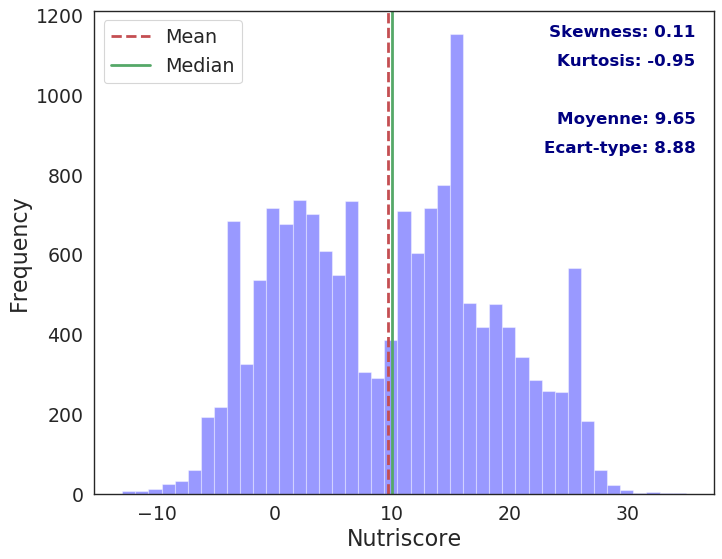

In [354]:
fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')

dataMean = data[['nutriscore_score']].mean()
dataMedian = data[['nutriscore_score']].median()

ax = sns.distplot(data[['nutriscore_score']],kde=False,color="blue")

ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %.2f" % data[['nutriscore_score']].skew(),\
            fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
            backgroundcolor='white', color='navy')
ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %.2f" % data[['nutriscore_score']].kurt(),\
            fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
            backgroundcolor='white', color='navy')
ax.text(x=0.97, y=0.79, transform=ax.transAxes, s="Moyenne: %.2f" % data[['nutriscore_score']].mean(),\
           fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
           backgroundcolor='white', color='navy')
ax.text(x=0.97, y=0.73, transform=ax.transAxes, s="Ecart-type: %.2f" % data[['nutriscore_score']].std(),\
           fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
           backgroundcolor='white', color='navy')

yMinMax = ax.get_ylim()

ax.axvline(float(dataMean),yMinMax[0],yMinMax[1],color='r', linestyle='--',linewidth=2.5)
ax.axvline(float(dataMedian),yMinMax[0],yMinMax[1], color='g', linestyle='-',linewidth=2.5)

plt.legend({'Mean':float(dataMean),'Median':float(dataMedian)},loc='upper left',fontsize='xx-large')

plt.xlabel('Nutriscore',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

figName = 'distribution_nutriscore.png'
plt.savefig(figName,bbox_inches="tight")
plt.show()

In [355]:
# Test de normalité de la distribution

## Test d'Agostino

alpha = 0.05

stat,pValue = stats.normaltest(data[['nutriscore_score']])

print(pValue)
if pValue > alpha:
    print('Ces données sont normalement distribuées')
else:
    print('Ces données ne sont pas normalement distribuées')

[0.]
Ces données ne sont pas normalement distribuées


La répartition du nutriscore montre une distribution bimodale, les deux modes étant 

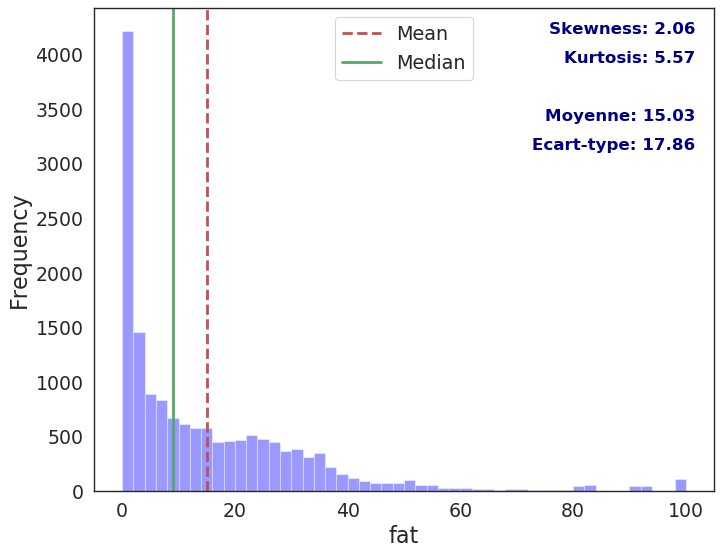

In [356]:
fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')

dataMean = data[['fat_100g']].mean()
dataMedian = data[['fat_100g']].median()

ax = sns.distplot(data[['fat_100g']],kde=False,color="blue")

ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %.2f" % data[['fat_100g']].skew(),\
            fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
            backgroundcolor='white', color='navy')
ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %.2f" % data[['fat_100g']].kurt(),\
            fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
            backgroundcolor='white', color='navy')
ax.text(x=0.97, y=0.79, transform=ax.transAxes, s="Moyenne: %.2f" % data[['fat_100g']].mean(),\
           fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
           backgroundcolor='white', color='navy')
ax.text(x=0.97, y=0.73, transform=ax.transAxes, s="Ecart-type: %.2f" % data[['fat_100g']].std(),\
           fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
           backgroundcolor='white', color='navy')
        
yMinMax = ax.get_ylim()

ax.axvline(float(dataMean),yMinMax[0],yMinMax[1],color='r', linestyle='--',linewidth=2.5)
ax.axvline(float(dataMedian),yMinMax[0],yMinMax[1], color='g', linestyle='-',linewidth=2.5)

plt.legend({'Mean':float(dataMean),'Median':float(dataMedian)},loc='upper center',fontsize='xx-large')

plt.xlabel('fat',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

figName = 'distribution_fat.png'
plt.savefig(figName,bbox_inches="tight")
plt.show()

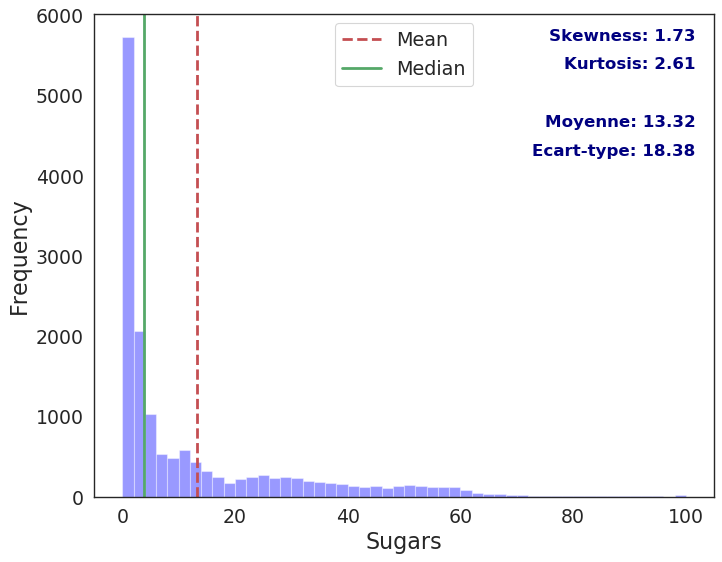

In [357]:
fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')

dataMean = data[['sugars_100g']].mean()
dataMedian = data[['sugars_100g']].median()

ax = sns.distplot(data[['sugars_100g']],kde=False,color="blue")

ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %.2f" % data[['sugars_100g']].skew(),\
            fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
            backgroundcolor='white', color='navy')
ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %.2f" % data[['sugars_100g']].kurt(),\
            fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
            backgroundcolor='white', color='navy')
ax.text(x=0.97, y=0.79, transform=ax.transAxes, s="Moyenne: %.2f" % data[['sugars_100g']].mean(),\
           fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
           backgroundcolor='white', color='navy')
ax.text(x=0.97, y=0.73, transform=ax.transAxes, s="Ecart-type: %.2f" % data[['sugars_100g']].std(),\
           fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
           backgroundcolor='white', color='navy')
        
yMinMax = ax.get_ylim()

ax.axvline(float(dataMean),yMinMax[0],yMinMax[1],color='r', linestyle='--',linewidth=2.5)
ax.axvline(float(dataMedian),yMinMax[0],yMinMax[1], color='g', linestyle='-',linewidth=2.5)

plt.legend({'Mean':float(dataMean),'Median':float(dataMedian)},loc='upper center',fontsize='xx-large')

plt.xlabel('Sugars',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

figName = 'distribution_sugars.png'
plt.savefig(figName,bbox_inches="tight")
plt.show()

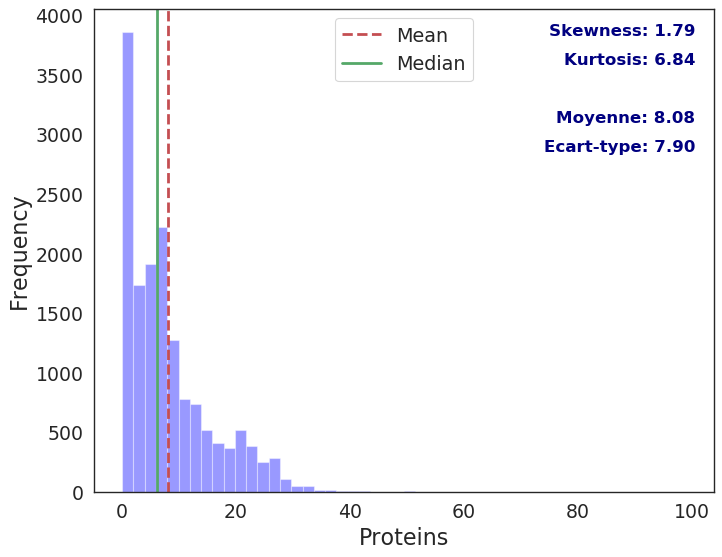

In [358]:
fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')

dataMean = data[['proteins_100g']].mean()
dataMedian = data[['proteins_100g']].median()

ax = sns.distplot(data[['proteins_100g']],kde=False,color="blue")

ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %.2f" % data[['proteins_100g']].skew(),\
            fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
            backgroundcolor='white', color='navy')
ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %.2f" % data[['proteins_100g']].kurt(),\
            fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
            backgroundcolor='white', color='navy')
ax.text(x=0.97, y=0.79, transform=ax.transAxes, s="Moyenne: %.2f" % data[['proteins_100g']].mean(),\
           fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
           backgroundcolor='white', color='navy')
ax.text(x=0.97, y=0.73, transform=ax.transAxes, s="Ecart-type: %.2f" % data[['proteins_100g']].std(),\
           fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
           backgroundcolor='white', color='navy')

yMinMax = ax.get_ylim()

ax.axvline(float(dataMean),yMinMax[0],yMinMax[1],color='r', linestyle='--',linewidth=2.5)
ax.axvline(float(dataMedian),yMinMax[0],yMinMax[1], color='g', linestyle='-',linewidth=2.5)

plt.legend({'Mean':float(dataMean),'Median':float(dataMedian)},loc='upper center',fontsize='xx-large')

plt.xlabel('Proteins',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

figName = 'distribution_proteins.png'
plt.savefig(figName,bbox_inches="tight")
plt.show()

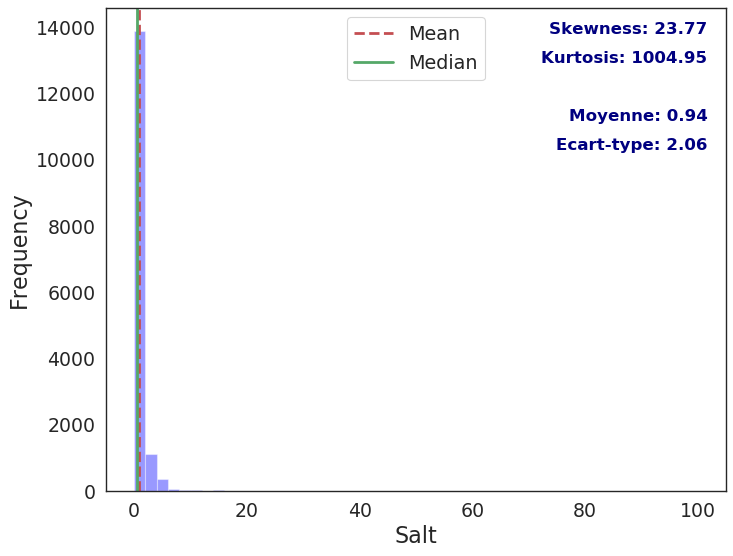

In [359]:
fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')

dataMean = data[['salt_100g']].mean()
dataMedian = data[['salt_100g']].median()

ax = sns.distplot(data[['salt_100g']],kde=False,color="blue")

ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %.2f" % data[['salt_100g']].skew(),\
            fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
            backgroundcolor='white', color='navy')
ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %.2f" % data[['salt_100g']].kurt(),\
            fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
            backgroundcolor='white', color='navy')
ax.text(x=0.97, y=0.79, transform=ax.transAxes, s="Moyenne: %.2f" % data[['salt_100g']].mean(),\
           fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
           backgroundcolor='white', color='navy')
ax.text(x=0.97, y=0.73, transform=ax.transAxes, s="Ecart-type: %.2f" % data[['salt_100g']].std(),\
           fontweight='demibold', fontsize=15, verticalalignment='top', horizontalalignment='right',\
           backgroundcolor='white', color='navy')

yMinMax = ax.get_ylim()

ax.axvline(float(dataMean),yMinMax[0],yMinMax[1],color='r', linestyle='--',linewidth=2.5)
ax.axvline(float(dataMedian),yMinMax[0],yMinMax[1], color='g', linestyle='-',linewidth=2.5)

plt.legend({'Mean':float(dataMean),'Median':float(dataMedian)},loc='upper center',fontsize='xx-large')

plt.xlabel('Salt',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

figName = 'distribution_salt.png'
plt.savefig(figName,bbox_inches="tight")
plt.show()

In [360]:
data['pnns_groups_1'].value_counts()

Sugary snacks              3324
Fish meat eggs             2152
Milk and dairy products    2026
Composite foods            1724
Cereals and potatoes       1656
Fruits and vegetables      1341
Beverages                  1320
Fat and sauces             1077
Salty snacks                940
Name: pnns_groups_1, dtype: int64

In [361]:
list_of_groups = data['pnns_groups_1'].value_counts().index

In [362]:
nutriScore = pd.DataFrame(np.nan,index = np.arange(data['pnns_groups_1'].value_counts()[0]),
                          columns=list_of_groups)

proteins = pd.DataFrame(np.nan,index = np.arange(data['pnns_groups_1'].value_counts()[0]),
                          columns=list_of_groups)
print(nutriScore.shape)
nutriScore.head()

(3324, 9)


,Sugary snacks,Fish meat eggs,Milk and dairy products,Composite foods,Cereals and potatoes,Fruits and vegetables,Beverages,Fat and sauces,Salty snacks
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [363]:
for idx in range(0,len(list_of_groups)):
    group = list_of_groups[idx]
   
    data0 = data[data['pnns_groups_1'] == group]
    m = len(data0['nutriscore_score'])
    
    nutriScore.iloc[0:m,idx] = data0['nutriscore_score'].values
    proteins.iloc[0:m,idx] = data0['proteins_100g'].values
    
nutriScore.to_csv('momo.csv')
nutriScore.head()

,Sugary snacks,Fish meat eggs,Milk and dairy products,Composite foods,Cereals and potatoes,Fruits and vegetables,Beverages,Fat and sauces,Salty snacks
0,16.0,4.0,-3.0,3.0,12.0,-5.0,5.0,11.0,15.0
1,20.0,4.0,14.0,-3.0,15.0,-6.0,2.0,5.0,5.0
2,13.0,-4.0,19.0,0.0,11.0,-5.0,6.0,8.0,5.0
3,22.0,20.0,0.0,4.0,0.0,-4.0,15.0,11.0,5.0
4,16.0,12.0,14.0,21.0,17.0,-2.0,10.0,18.0,11.0


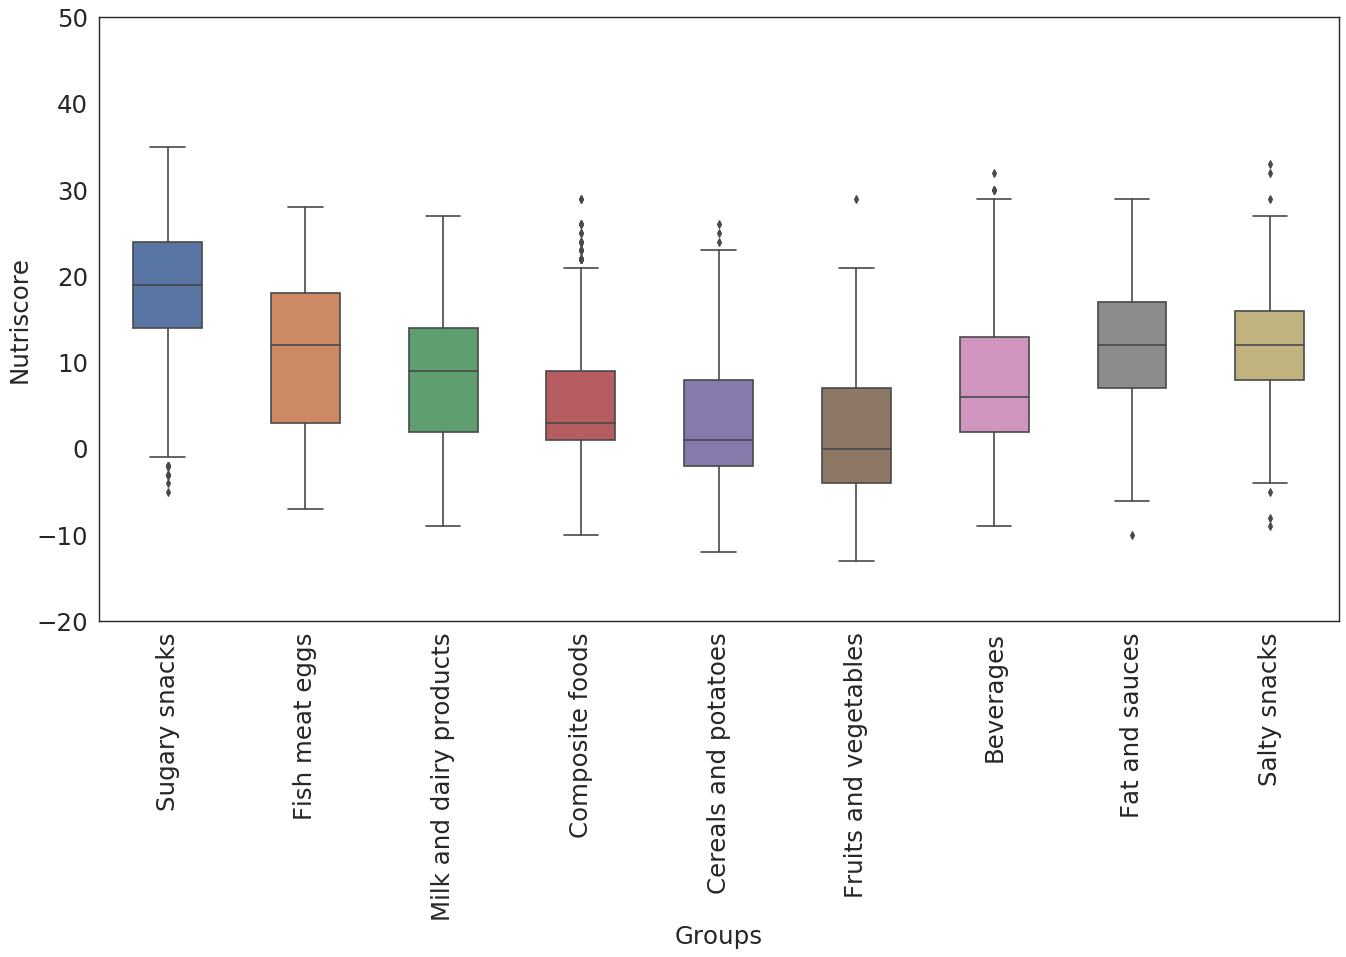

In [364]:
fig = plt.figure(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')

ax = sns.boxplot(x="variable",y="value",data = pd.melt(nutriScore),width=0.5)
ax.set_xticklabels(nutriScore.columns,rotation=90)

plt.xlabel('Groups',fontsize=22)
plt.ylabel('Nutriscore',fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.ylim(-20,50)
figName = 'distribution_comparison_nutriscore.png'
plt.savefig(figName,bbox_inches="tight")
plt.show()

In [365]:
# Comparaison des distributions: Test de Kruskal
alpha = 0.05
stats.kruskal(nutriScore.iloc[:,0],nutriScore.iloc[:,1],nutriScore.iloc[:,2],nutriScore.iloc[:,3],
                           nutriScore.iloc[:,4],nutriScore.iloc[:,5],nutriScore.iloc[:,6],nutriScore.iloc[:,7],
                           nutriScore.iloc[:,8],nan_policy='omit')



KruskalResult(statistic=6005.683787485084, pvalue=0.0)

Je vais regarder maintenant la distribution au sein de deux catégories particulières: les catégories 'Fish meat eggs' et 'Beverages'. 

In [366]:
pd.options.display.max_columns = 130

fishMeatEggs = data[data['pnns_groups_1'] == 'Fish meat eggs']
fishMeatEggs_groups = fishMeatEggs['pnns_groups_2'].value_counts().index

fishMeatEggsNutriscore = pd.DataFrame(np.nan,index = np.arange(fishMeatEggs['pnns_groups_2'].value_counts()[0]),
                          columns=fishMeatEggs_groups)

for idx in range(0,len(fishMeatEggs_groups)):
    group = fishMeatEggs_groups[idx]
   
    data0 = fishMeatEggs[fishMeatEggs['pnns_groups_2'] == group]
    m = len(data0['nutriscore_score'])
    
    fishMeatEggsNutriscore.iloc[0:m,idx] = data0['nutriscore_score'].values

fishMeatEggsNutriscore.head()


,Processed meat,Fish and seafood,Meat,Eggs,Offals
0,20.0,-1.0,4.0,0.0,3.0
1,12.0,-1.0,4.0,-1.0,16.0
2,17.0,-2.0,-4.0,-1.0,18.0
3,4.0,0.0,18.0,-4.0,18.0
4,18.0,-3.0,11.0,-1.0,11.0


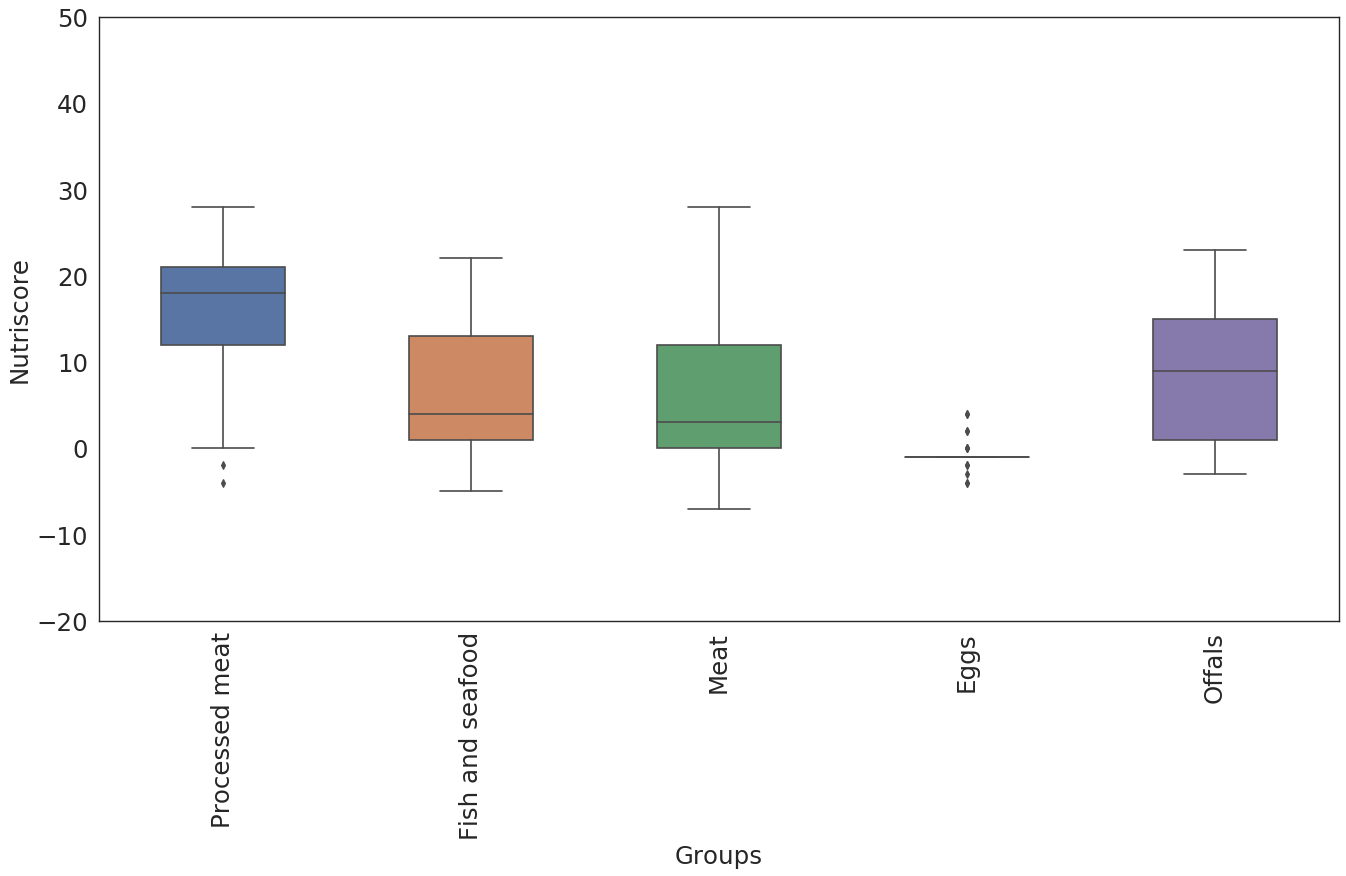

In [367]:
fig = plt.figure(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')

ax = sns.boxplot(x="variable",y="value",data = pd.melt(fishMeatEggsNutriscore),width=0.5)
ax.set_xticklabels(fishMeatEggsNutriscore.columns,rotation=90)

plt.xlabel('Groups',fontsize=22)
plt.ylabel('Nutriscore',fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.ylim(-20,50)
figName = 'distribution_comparison_fishMeatEggsNutriscore.png'
plt.savefig(figName,bbox_inches="tight")
plt.show()

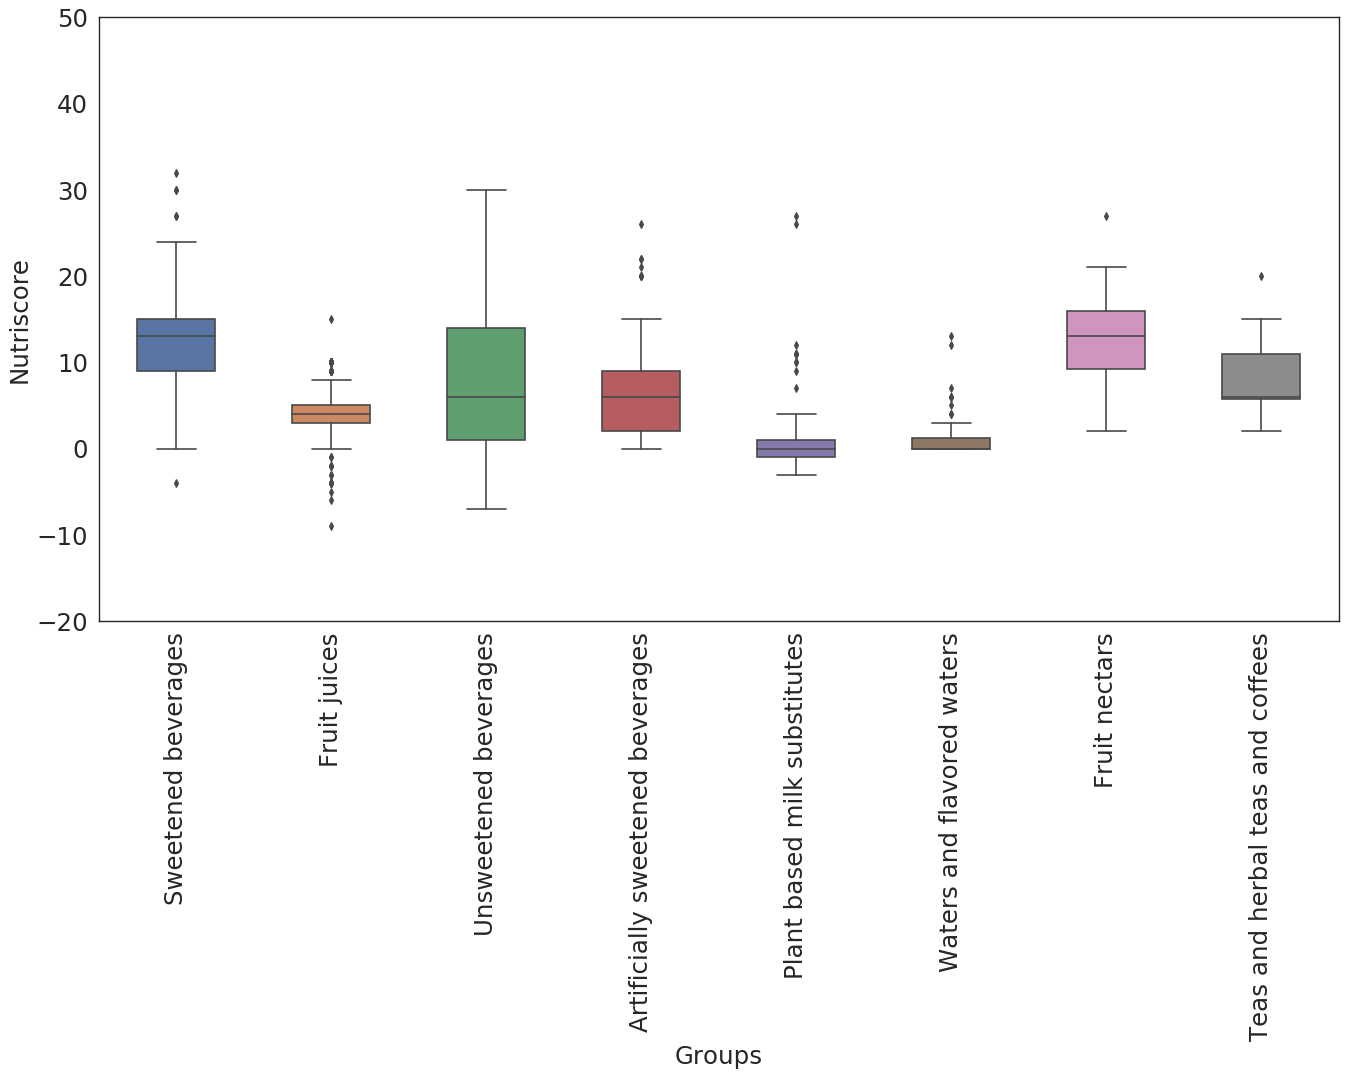

In [368]:
beverages = data[data['pnns_groups_1'] == 'Beverages']
beverages_groups = beverages['pnns_groups_2'].value_counts().index

beveragesNutriscore = pd.DataFrame(np.nan,index = np.arange(beverages['pnns_groups_2'].value_counts()[0]),
                          columns=beverages_groups)

for idx in range(0,len(beverages_groups)):
    group = beverages_groups[idx]
   
    data0 = beverages[beverages['pnns_groups_2'] == group]
    m = len(data0['nutriscore_score'])
    
    beveragesNutriscore.iloc[0:m,idx] = data0['nutriscore_score'].values

fig = plt.figure(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')

ax = sns.boxplot(x="variable",y="value",data = pd.melt(beveragesNutriscore),width=0.5)
ax.set_xticklabels(beveragesNutriscore.columns,rotation=90)

plt.xlabel('Groups',fontsize=22)
plt.ylabel('Nutriscore',fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

plt.ylim(-20,50)
figName = 'distribution_comparison_beveragesNutriscore.png'
plt.savefig(figName,bbox_inches="tight")
plt.show()

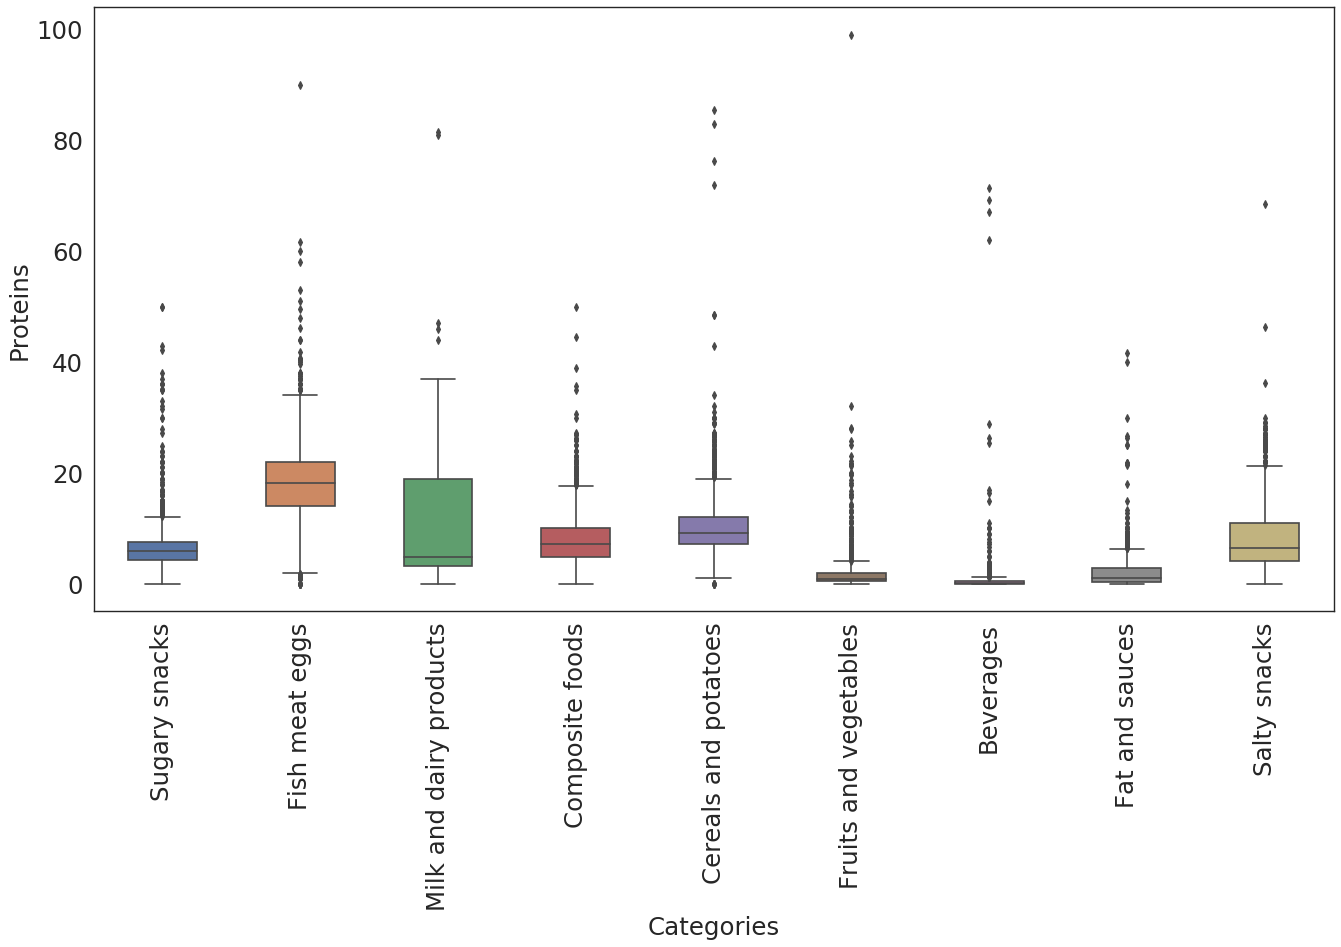

In [369]:
fig = plt.figure(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')

ax = sns.boxplot(x="variable",y="value",data = pd.melt(proteins),width=0.5)
ax.set_xticklabels(proteins.columns,rotation=90)

plt.xlabel('Categories',fontsize=22)
plt.ylabel('Proteins',fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

#plt.ylim(-20,50)
figName = 'categories_boxplot_proteins.png'
plt.savefig(figName,bbox_inches="tight")
plt.show()

In [370]:
newdata0 = data[['additives_n','nutriscore_score','energy_100g','fat_100g','saturated-fat_100g',
                'carbohydrates_100g','sugars_100g','proteins_100g','salt_100g','sodium_100g']]

newdata0 = newdata0.dropna()
print(newdata0.isna().sum().sum())
newdata0.to_csv('momo.csv')
newdata0.head()

0


,additives_n,nutriscore_score,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
0,0.0,5.0,192.0,0.04,0.04,11.1,10.6,0.2,0.00,0.000
1,0.0,3.0,285.0,3.70,2.50,5.3,1.9,3.1,0.50,0.200
2,0.0,15.0,2259.0,34.00,3.10,50.0,1.0,6.0,1.40,0.560
3,0.0,-3.0,234.0,0.00,0.00,7.5,7.5,6.6,0.21,0.084
4,2.0,-5.0,79.0,0.40,0.40,0.6,0.6,2.2,0.70,0.280


In [371]:
def corMatWithPValues(dataframe):
    cols = dataframe.shape[1]
    r = pd.DataFrame(np.ones(shape=(cols, cols)),index=dataframe.columns,columns=dataframe.columns)
    p = pd.DataFrame(np.ones(shape=(cols, cols)),index=dataframe.columns,columns=dataframe.columns)
    
    for i in range(cols):
        for j in range(i+1, cols):
            cor, pval = stats.pearsonr(dataframe.iloc[:,i], dataframe.iloc[:,j])
            r.iloc[i, j] = r.iloc[j, i] = cor
            p.iloc[i, j] = p.iloc[j, i] = pval

    return r, p

corMat_1,pp = corMatWithPValues(newdata0)
corMat_2 = newdata0.corr()

corMat_1.head(n=10)
corMat_2.head(n=10)

,additives_n,nutriscore_score,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
additives_n,1.000000,0.132149,0.004243,-0.054451,-0.028923,0.130725,0.140691,-0.097805,-0.017839,-0.017808
nutriscore_score,0.132149,1.000000,0.600509,0.523538,0.605372,0.240797,0.423326,0.088361,0.167906,0.167886
energy_100g,0.004243,0.600509,1.000000,0.791878,0.600538,0.433874,0.295359,0.161313,-0.004369,-0.004406
fat_100g,-0.054451,0.523538,0.791878,1.000000,0.729243,-0.110827,-0.042583,0.133319,0.036351,0.036276
saturated-fat_100g,-0.028923,0.605372,0.600538,0.729243,1.000000,-0.049855,0.068155,0.155244,0.020402,0.020394
carbohydrates_100g,0.130725,0.240797,0.433874,-0.110827,-0.049855,1.000000,0.678096,-0.203631,-0.143852,-0.143827
sugars_100g,0.140691,0.423326,0.295359,-0.042583,0.068155,0.678096,1.000000,-0.302361,-0.162038,-0.162018
proteins_100g,-0.097805,0.088361,0.161313,0.133319,0.155244,-0.203631,-0.302361,1.000000,0.251168,0.251211
salt_100g,-0.017839,0.167906,-0.004369,0.036351,0.020402,-0.143852,-0.162038,0.251168,1.000000,0.999981
sodium_100g,-0.017808,0.167886,-0.004406,0.036276,0.020394,-0.143827,-0.162018,0.251211,0.999981,1.000000


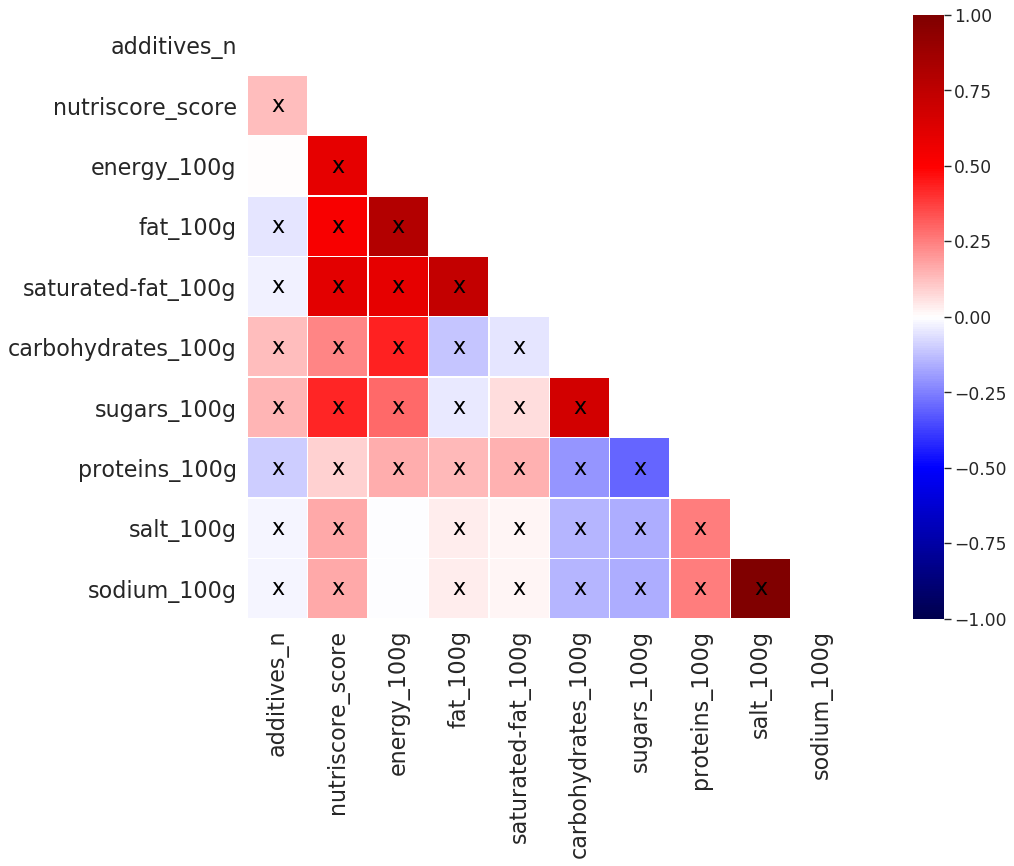

In [372]:
corMat, pValue = corMatWithPValues(newdata0)

fig,ax = plt.subplots(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')

mask = np.triu(np.ones_like(corMat, dtype=np.bool))

g = sns.heatmap(corMat, mask=mask, cmap='seismic',center=0,vmin=-1,vmax=1,square=True,
                linewidths=.5,ax=ax)

#ax.scatter(corMat.iloc[:,0],corMat.iloc[0,:], marker="x", color="black", s=100)

for j in range(len(newdata0.columns)):
    for i in range(len(newdata0.columns)):
        if pValue.iloc[i,j] < 0.05 and mask[i,j]:
            text = ax.text(i+0.5, j+0.5, 'x',horizontalalignment="center", verticalalignment="center",
                           fontsize=20,color="black")
        
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

figName = 'correlation_matrix_categories.png'
plt.savefig(figName,bbox_inches="tight")
#corMat.head()

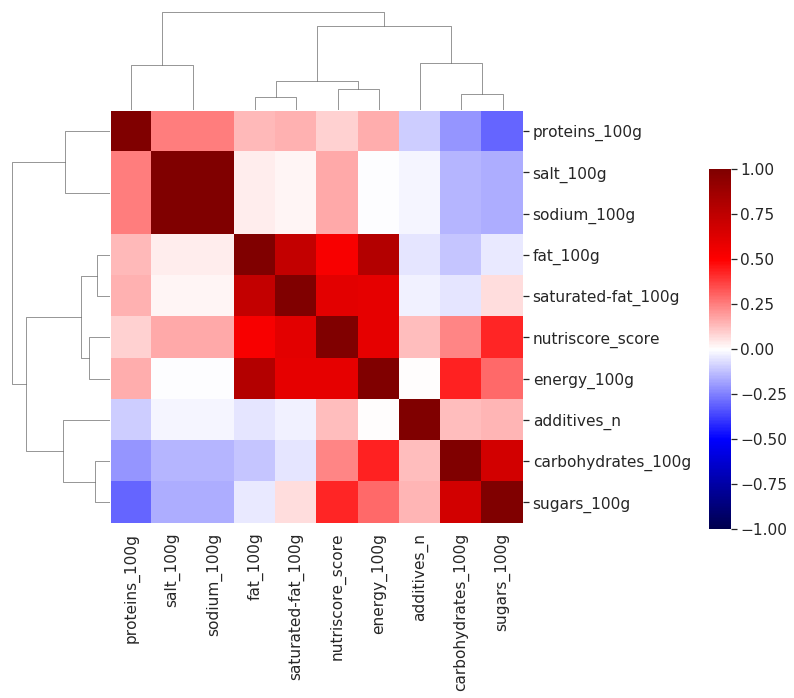

In [373]:
#fig,ax = plt.subplots(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')
sns.set(font_scale=1.4)
g = sns.clustermap(corMat,cmap='seismic',method='ward',figsize=(10, 10),vmin=-1,vmax=1,cbar_pos=(1.0, .25, .03, .5))

figName = 'clustermap_variables.png'
plt.savefig(figName,bbox_inches="tight")

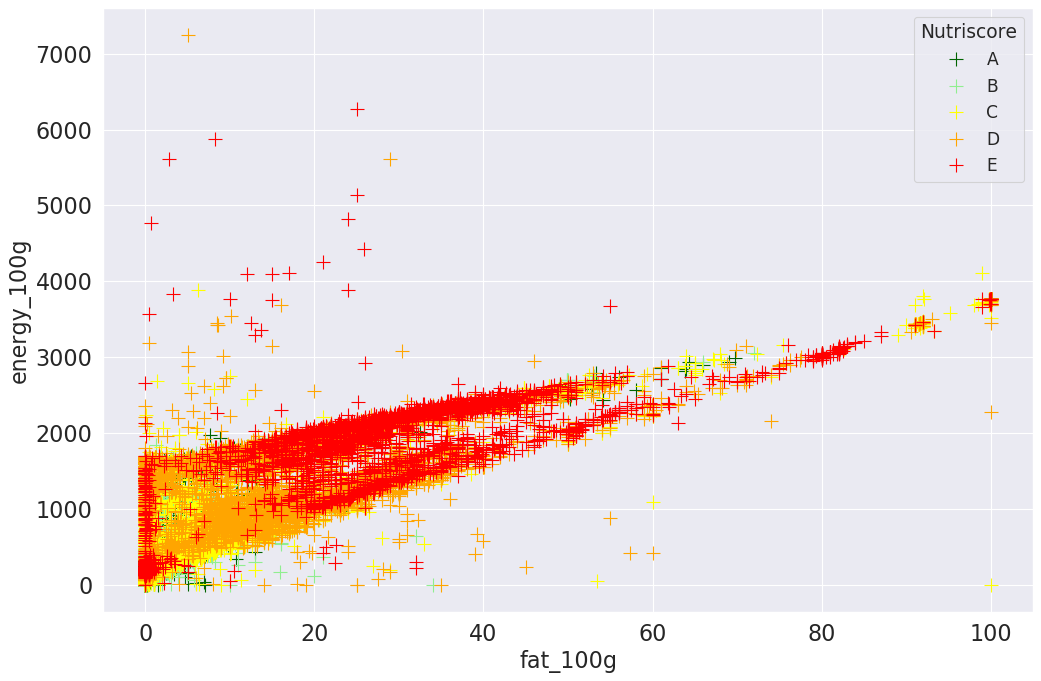

In [374]:
newdata1 = data[['additives_n','nutriscore_score','nutriscore_grade','energy_100g','fat_100g','saturated-fat_100g',
                'carbohydrates_100g','sugars_100g','proteins_100g','salt_100g','sodium_100g']]


groups = newdata1.groupby('nutriscore_grade')

colors = ['darkgreen','lightgreen','yellow','orange','red']

fig,ax = plt.subplots(figsize=(15, 10), dpi= 80, facecolor='white', edgecolor='k')

i = 0
for name, group in groups:
    #print(name.upper(),group)
    #ax.patch.set_facecolor('white')
    ax.plot(group.fat_100g, group.energy_100g, marker='+', mfc = colors[i],mec = colors[i],ls='', 
            ms=12, label=name.upper())
    i = i + 1

ax.legend(title='Nutriscore')

plt.xlabel('fat_100g',fontsize=20)
plt.ylabel('energy_100g',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


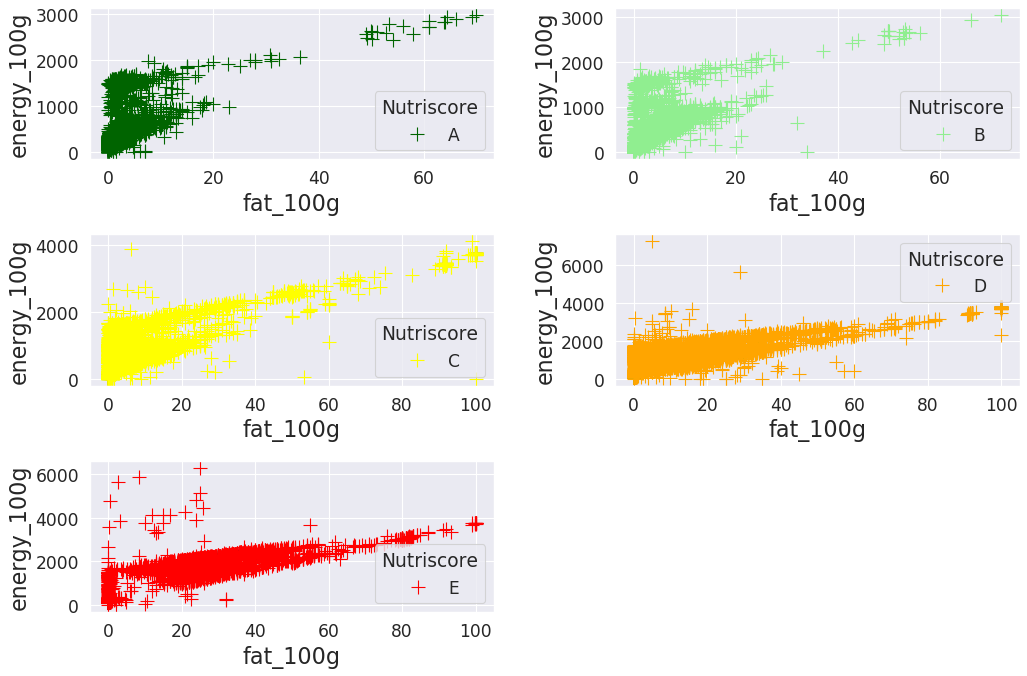

In [411]:
fig,axes = plt.subplots(3,2,figsize=(15, 10), dpi= 80, facecolor='white', edgecolor='k')

print(type(groups))
i = 0
for ax,group in zip(axes.flatten(),groups):
    ax.plot(group[1].fat_100g, group[1].energy_100g, marker='+', mfc = colors[i],mec = colors[i],ls='', 
            ms=12, label=group[0].upper())
    
    ax.legend(title='Nutriscore')
    ax.set_xlabel('fat_100g',fontsize=20)
    ax.set_ylabel('energy_100g',fontsize=20)

    i = i + 1

fig.delaxes(axes[2][1])

plt.subplots_adjust(hspace=0.5,wspace=0.3)
#plt.xticks(fontsize=20)
#plt.yticks(fontsize=20)
#plt.show()

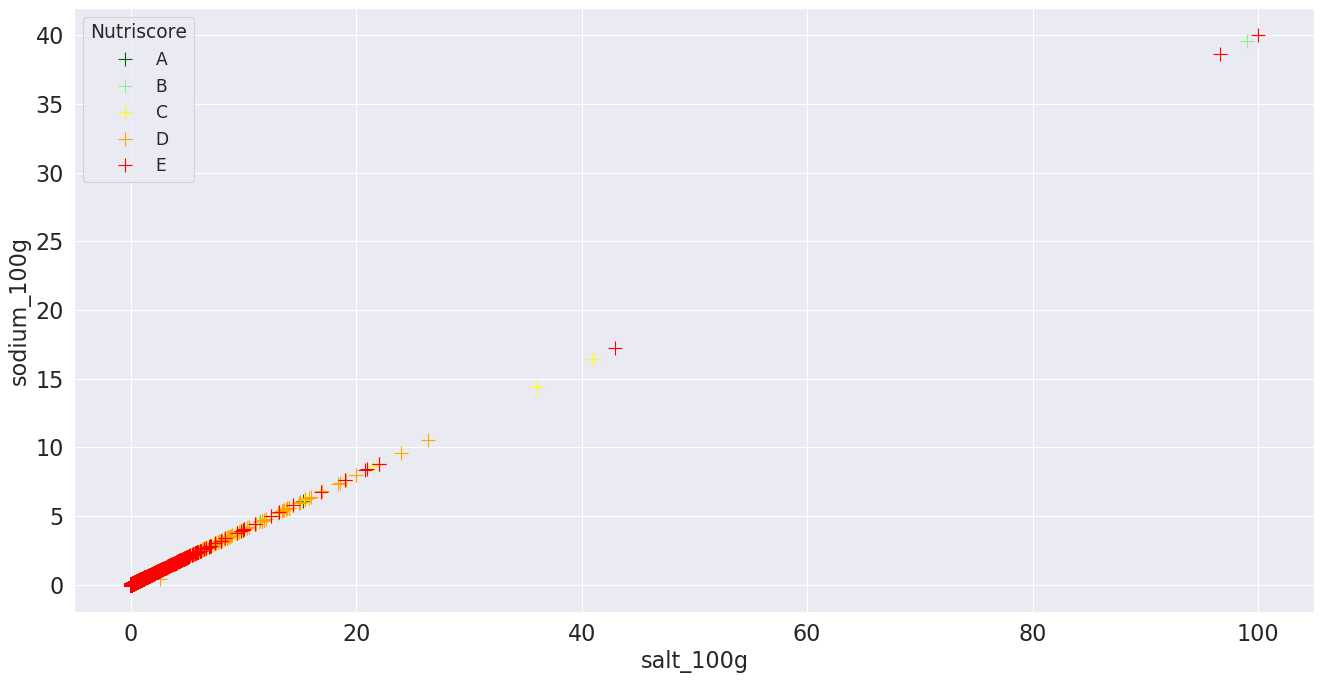

In [312]:
fig,ax = plt.subplots(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')

i = 0
for name, group in groups:
    #print(name.upper(),group)
    ax.plot(group.salt_100g, group.sodium_100g, marker='+', mfc = colors[i],mec = colors[i],ls='', 
            ms=12, label=name.upper())
    i = i + 1

ax.legend(title='Nutriscore')

plt.xlabel('salt_100g',fontsize=20)
plt.ylabel('sodium_100g',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

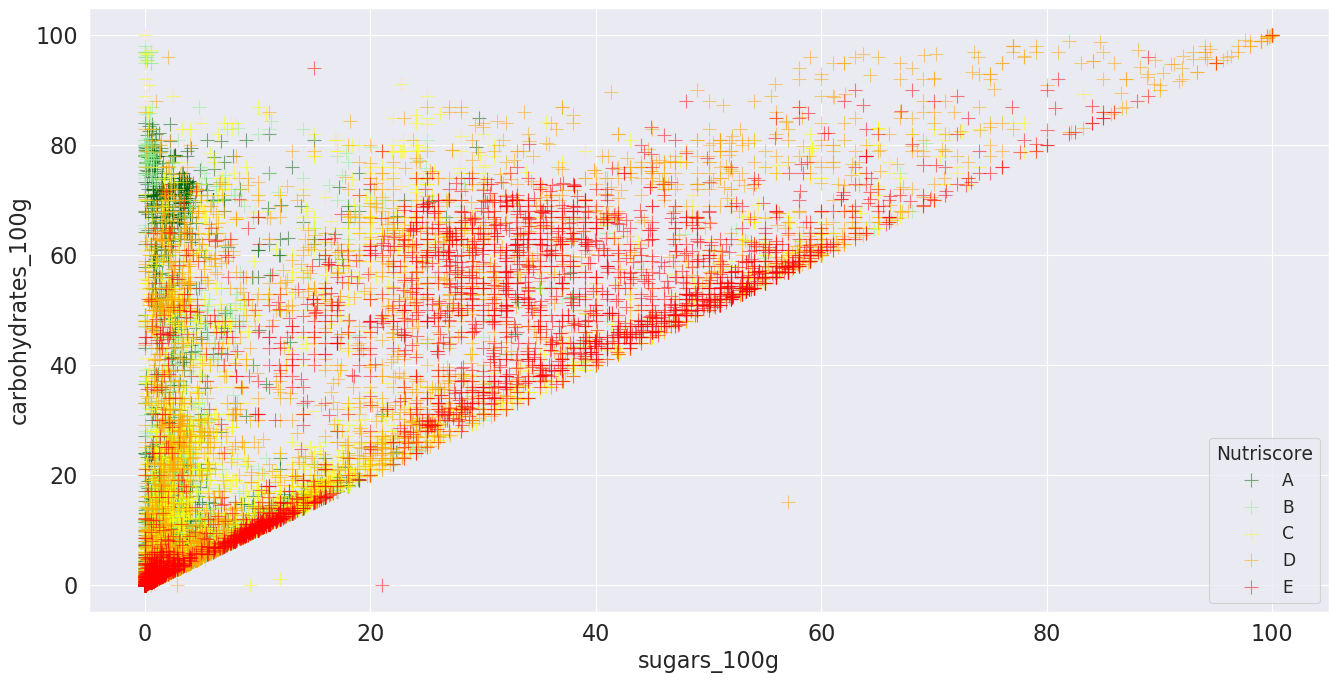

In [313]:
fig,ax = plt.subplots(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')

i = 0
for name, group in groups:
    #print(name.upper(),group)
    ax.plot(group.sugars_100g, group.carbohydrates_100g, marker='+', alpha=0.5, mfc = colors[i],mec = colors[i],ls='', 
            ms=12, label=name.upper())
    i = i + 1

ax.legend(title='Nutriscore')

plt.xlabel('sugars_100g',fontsize=20)
plt.ylabel('carbohydrates_100g',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

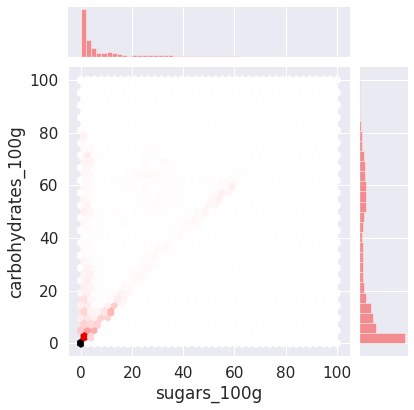

In [347]:
g = sns.jointplot(x="sugars_100g", y="carbohydrates_100g", 
                  data=newdata1[['sugars_100g','carbohydrates_100g']],kind="hex",color="red")

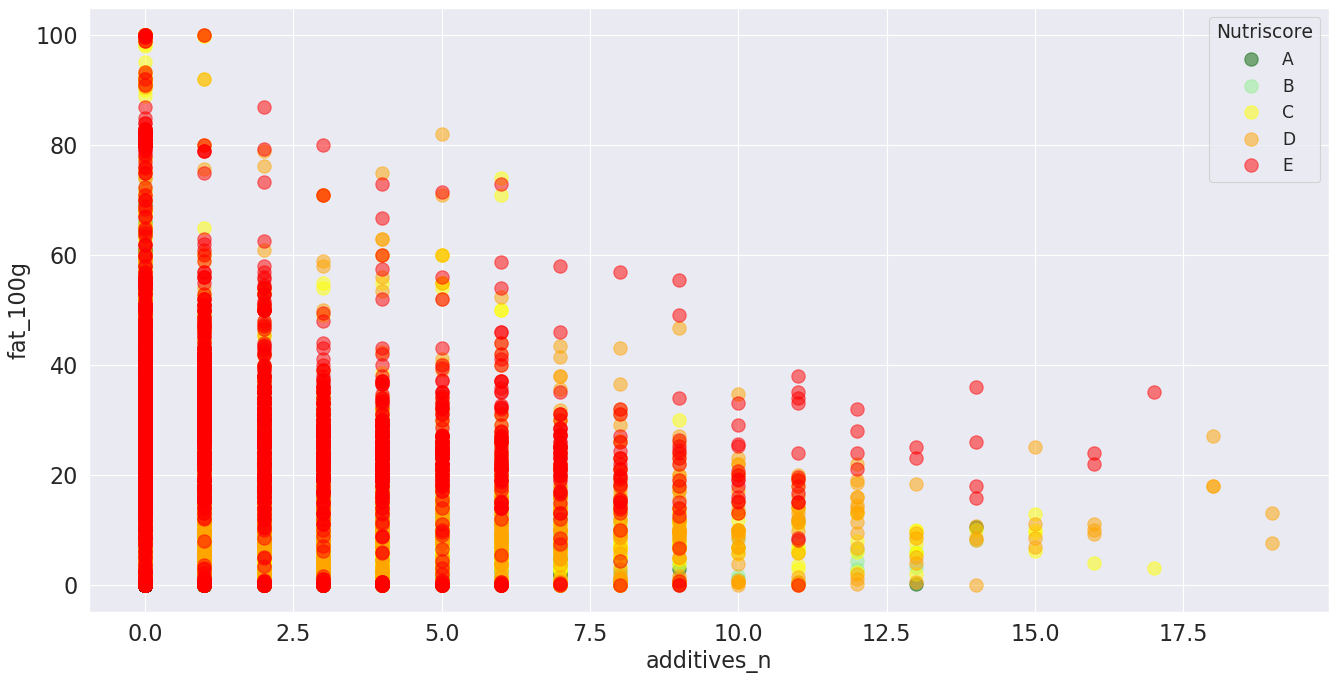

In [69]:
fig,ax = plt.subplots(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')

i = 0
for name, group in groups:
    #print(name.upper(),group)
    ax.plot(group.additives_n, group.fat_100g, marker='o', alpha=0.5, mfc = colors[i],mec = colors[i],ls='', 
            ms=12, label=name.upper())
    i = i + 1

ax.legend(title='Nutriscore')

plt.xlabel('additives_n',fontsize=20)
plt.ylabel('fat_100g',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

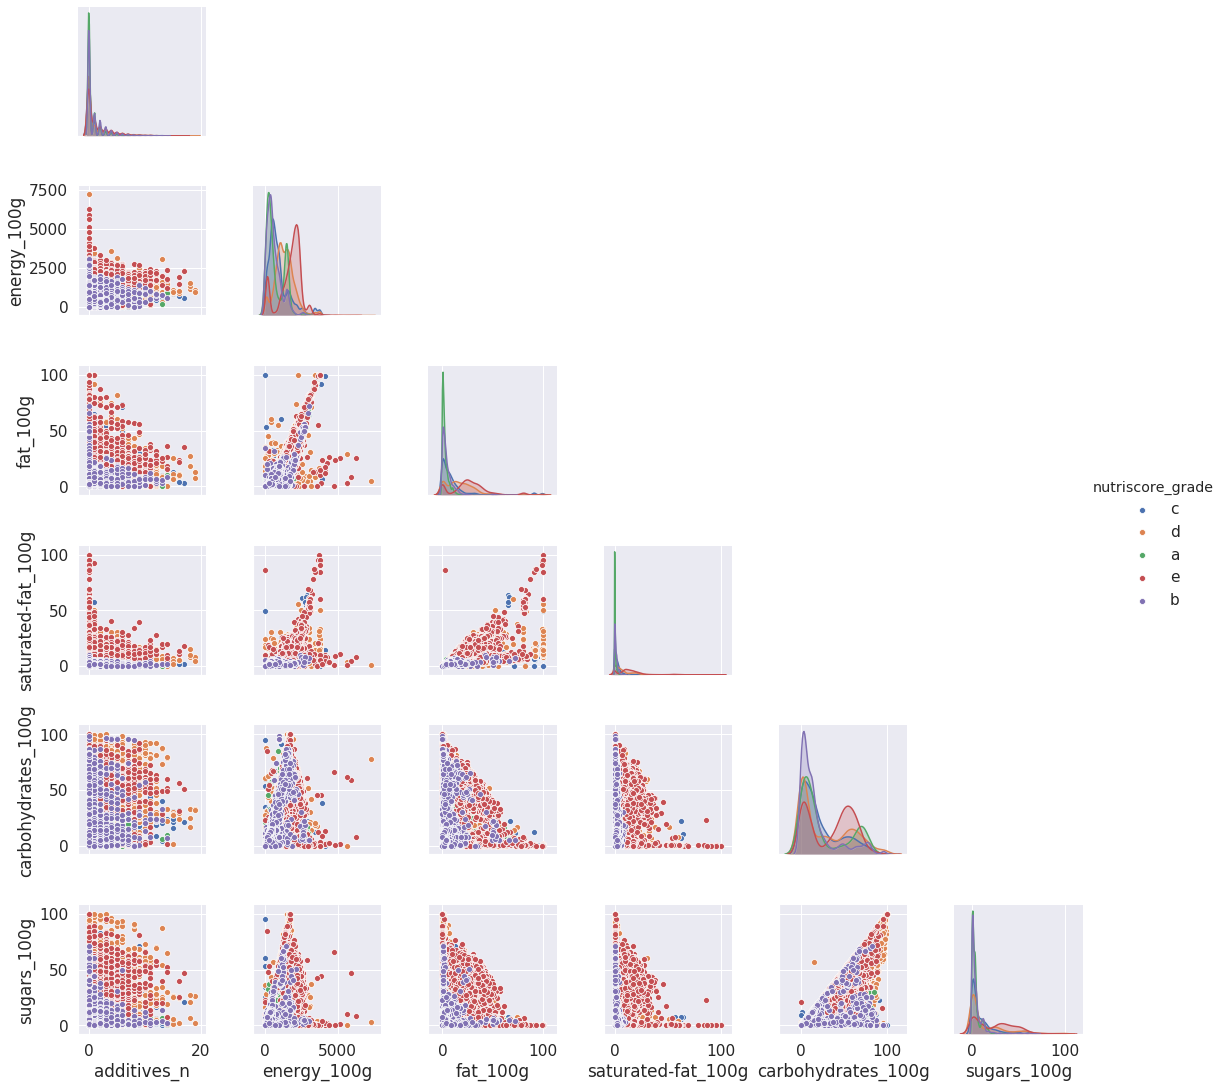

In [83]:
newdata2 = data[['nutriscore_grade','additives_n','energy_100g','fat_100g','saturated-fat_100g',
                 'carbohydrates_100g','sugars_100g']]

sns.set(font_scale=1.4)
g = sns.pairplot(newdata2,hue='nutriscore_grade', corner = True)
#newdata2.head()

[3.09662544e+01 2.41816839e+01 1.64794699e+01 9.59570815e+00
 8.10368245e+00 5.35025896e+00 2.72389220e+00 2.26189024e+00
 3.36971688e-01 1.88078119e-04]


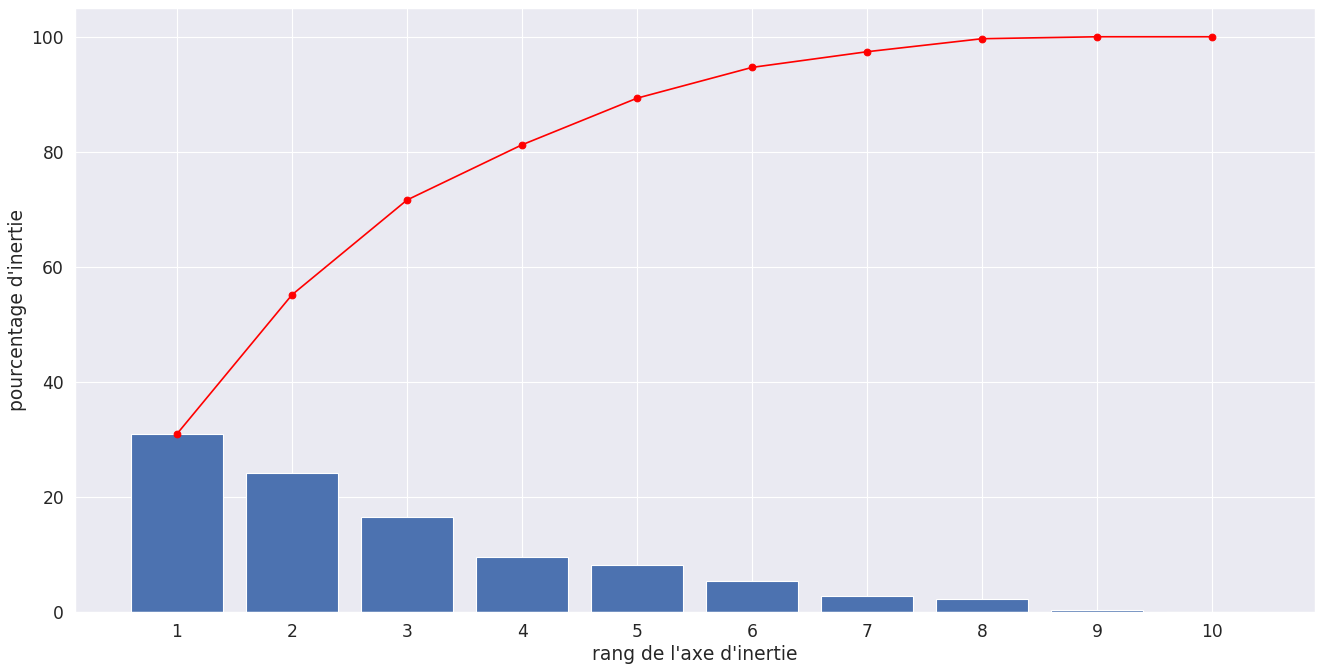

In [279]:
from sklearn import decomposition
from sklearn import preprocessing

newdata3 = data[['additives_n','nutriscore_score','energy_100g','fat_100g','saturated-fat_100g',
                'carbohydrates_100g','sugars_100g','proteins_100g','salt_100g','sodium_100g']]

# Centrage et reduction des données

X = newdata3.values
xScale = preprocessing.StandardScaler().fit_transform(X)

# Calcul de l'ACP
acp = decomposition.PCA()
acp.fit(xScale)

# Représentation des valeurs propres

vp = acp.explained_variance_ratio_*100
print(vp)

fig,ax = plt.subplots(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.bar(np.arange(len(vp))+1, vp)
plt.plot(np.arange(len(vp))+1, vp.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.xticks(np.arange(len(vp))+1)

plt.show()

In [280]:
# Détermination du nombre de facteur à retenir (test des batons brisés)

## Détermination des valeurs propres
eigval = (newdata3.shape[0]-1)/newdata3.shape[0]*acp.explained_variance_

## Détermination des seuils
seuil = 1/np.arange(len(newdata3.columns),0,-1)
seuil = np.cumsum(seuil)
seuil[::-1]

testData= pd.DataFrame({'Eigen Values':eigval,'Thresold':seuil})
testData

,Eigen Values,Thresold
0,3.096625,0.100000
1,2.418168,0.211111
2,1.647947,0.336111
3,0.959571,0.478968
4,0.810368,0.645635
5,0.535026,0.845635
6,0.272389,1.095635
7,0.226189,1.428968
8,0.033697,1.928968
9,0.000019,2.928968


In [142]:
thrsld = 1+2*np.sqrt((len(newdata3.columns)-1)/(newdata3.shape[0]-1))
thrsld

1.0481016982938425

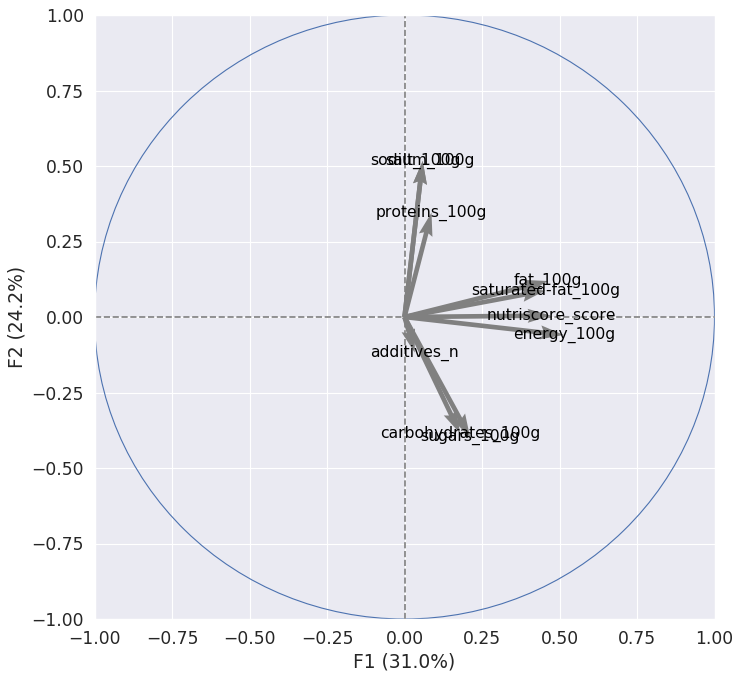

In [125]:
# Cercle de corrélation dans le premier plan factoriel (F1 et F2)

fig,ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

pcs = acp.components_

xmin, xmax, ymin, ymax = -1, 1, -1, 1

## Représentation des vecteurs
plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[0,:], pcs[1,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")

## Affichage des variables
labels = newdata3.columns
for i,(x, y) in enumerate(pcs[[0,1]].T):
    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', color="black")
                
## Affichage du cercle
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

## Définition des limites du graphique
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
        
## Affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

## Nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(1, round(vp[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(vp[1],1)))

plt.show()

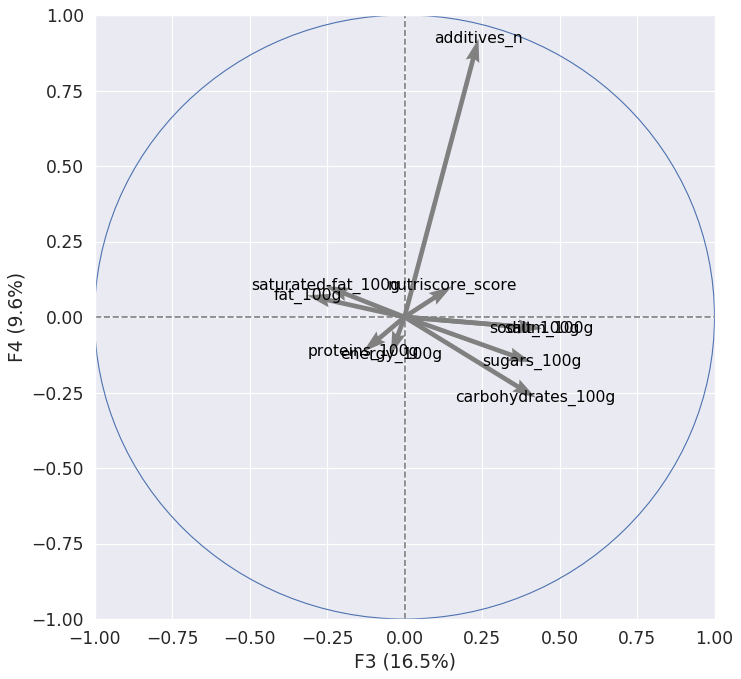

In [128]:
# Cercle de corrélation dans le deuxieme plan factoriel (F3 et F4)

fig,ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

pcs = acp.components_

xmin, xmax, ymin, ymax = -1, 1, -1, 1

## Représentation des vecteurs
plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[2,:], pcs[3,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")

## Affichage des variables
labels = newdata3.columns
for i,(x, y) in enumerate(pcs[[2,3]].T):
    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', color="black")
                
## Affichage du cercle
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

## Définition des limites du graphique
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
        
## Affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

## Nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(3, round(vp[2],1)))
plt.ylabel('F{} ({}%)'.format(4, round(vp[3],1)))

plt.show()

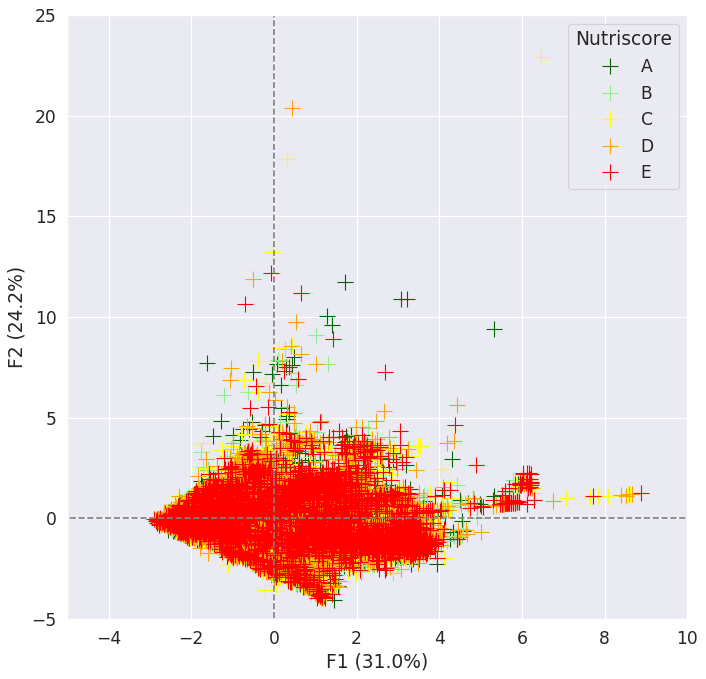

In [418]:
# Représentation des individus dans le premier plan factoriel (F1 et F2)

PCs = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']

projectedValues = acp.transform(xScale)

projectedValuesDF = pd.DataFrame(projectedValues,columns=PCs)
projectedValuesDF['product_name'] = data['product_name']
projectedValuesDF['nutriscore_grade'] = data['nutriscore_grade']

groups = projectedValuesDF.groupby('nutriscore_grade')

colors = ['darkgreen','lightgreen','yellow','orange','red']

fig,ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

i = 0
for name, group in groups:
    #print(name.upper(),group)
    #ax.patch.set_facecolor('white')
    ax.plot(group.PC1, group.PC2, marker='+', mfc = colors[i],mec = colors[i],ls='', 
            ms=15, label=name.upper())
    i = i + 1
    
#plt.scatter(projectedValues[:,0],projectedValues[:,1],marker='+')

ax.legend(title='Nutriscore')

boundary = np.max(np.abs(projectedValues[:, [0,1]]))  * 1.1
#plt.xlim([-boundary,boundary])
#plt.ylim([-boundary,boundary])

plt.xlim([-5,10])
plt.ylim([-5,25])
        
# affichage des lignes horizontales et verticales
plt.plot([-100, 100], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-100, 100], color='grey', ls='--')

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(1, round(vp[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(vp[1],1)))

plt.show()

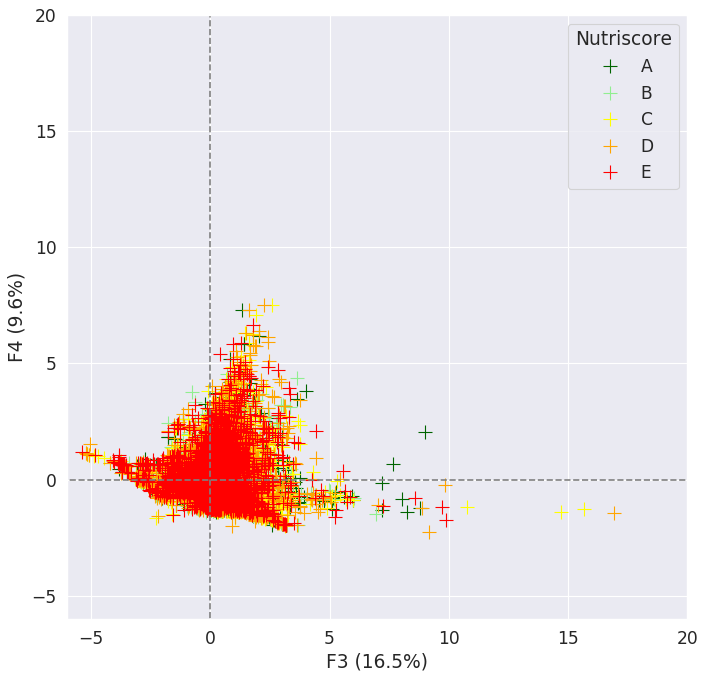

In [340]:
# Représentation des individus dans le deuxième plan factoriel (F3 et F4)
fig,ax = plt.subplots(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')

i = 0
for name, group in groups:
    #print(name.upper(),group)
    #ax.patch.set_facecolor('white')
    ax.plot(group.PC3, group.PC4, marker='+', mfc = colors[i],mec = colors[i],ls='', 
            ms=12, label=name.upper())
    i = i + 1
    
#plt.scatter(projectedValues[:,0],projectedValues[:,1],marker='+')

ax.legend(title='Nutriscore')

boundary = np.max(np.abs(projectedValues[:, [0,1]]))  * 1.1
#plt.xlim([-boundary,boundary])
#plt.ylim([-boundary,boundary])

plt.xlim([-6,20])
plt.ylim([-6,20])
        
# affichage des lignes horizontales et verticales
plt.plot([-100, 100], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-100, 100], color='grey', ls='--')

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(3, round(vp[2],1)))
plt.ylabel('F{} ({}%)'.format(4, round(vp[3],1)))

plt.show()

In [144]:
data['product_name']

0                             jus pomme cerise
1             & sully a mild thai chicken soup
2        (lot de 2) chips saveur poulet braisé
3                        0% fat natural yogurt
4                  1 / 2champ.ent.1er choix bf
                         ...                  
15599                            Île flottante
15600                      Üse: tomaten: pulpa
15601                            Гречка экстра
15602                         Домашна лютеница
15603                             Золотая рига
Name: product_name, Length: 15560, dtype: object

In [277]:
appData = data[['product_name','additives_n','pnns_groups_1','pnns_groups_2','nutriscore_score',
                'nutriscore_grade','energy_100g','fat_100g','saturated-fat_100g','carbohydrates_100g',
                'sugars_100g','proteins_100g','salt_100g','sodium_100g']]

def find_product():
    productName = input('Entrez le nom du produit que vous recherchez!\n')
    print('Vous recherchez:',productName)
    isProduct = appData.loc[appData['product_name'] == productName]
        
    while isProduct.empty:
        print('Ce produit n\'existe pas! Veuillez saisir un autre produit!\n')
        
    return isProduct

def check_recommendable_product(isProduct,thSugar,thFat):
    group =  isProduct.loc[isProduct.index,'pnns_groups_2']
    #print(group)
    products = appData.loc[data['pnns_groups_2'] == group.iloc[0]]
    products = products[products['fat_100g']<= thFat].dropna(how='any')
    products = products[products['sugars_100g']>= thSugar]
    print(products.shape)
    
    if ~products.empty:
        print("Nous vous recommandons les produits suivant:")
        products = products.sort_values(by=['sugars_100g'],ascending=False)
        print(products['product_name'])
    
def check_product(isProduct):
    dietValue = input('Etes-vous diabetique? Répondez par Oui ou Non.\n')
    if dietValue in ['Oui','O','o']:
        diet = True
    else:
        diet = False
        
    if diet:
        thSugar = 13.32
        thFat = 5.0
        
        if isProduct['fat_100g'].values > thFat:
            print("Ce produits n'est pas recommandable pour un diabétique")
            check_recommendable_product(isProduct,thSugar,thFat)
        else:
            print("Vous pouvez prendre ce produit")
    
        
def get_product():
    product = find_product()
    #check_recommendable_product(product,13.32,5.0)
    
    check_product(product)
    

In [278]:
get_product()

Entrez le nom du produit que vous recherchez!
0% fat natural yogurt
Vous recherchez: 0% fat natural yogurt
Etes-vous diabetique? Répondez par Oui ou Non.
O
Vous pouvez prendre ce produit


In [236]:
testData = data[data['fat_100g']<= 5.0]
testData.head()

,Unnamed: 0,creator,created_t,last_modified_t,product_name,labels_en,countries_en,allergens,additives_n,additives_tags,nutriscore_score,nutriscore_grade,pnns_groups_1,pnns_groups_2,main_category_en,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,soluble-fiber_100g,insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,699243,kiliweb,1518620092,1587844229,jus pomme cerise,NaN,France,NaN,0.0,NaN,5.0,c,Beverages,Unsweetened beverages,Beverages,NaN,192.0,192.0,NaN,0.04,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.1,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2,NaN,NaN,0.2,NaN,NaN,NaN,0.00,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1004703,kiliweb,1510174887,1582759325,& sully a mild thai chicken soup,"Gluten free, Non vegetarian","Belgium, France","Celery, Milk",0.0,NaN,3.0,c,Composite foods,One dish meals,Soups,NaN,285.0,285.0,NaN,3.70,2.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.3,1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN,3.1,NaN,NaN,NaN,0.50,0.200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,980186,kiliweb,1508918106,1566583869,0% fat natural yogurt,"Organic, No added sugar",France,Milk,0.0,NaN,-3.0,a,Milk and dairy products,Milk and yogurt,Plain yogurts,NaN,234.0,234.0,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,6.6,NaN,NaN,NaN,0.21,0.084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,614545,kiliweb,14967

In [183]:
dietValue = 'O'
dietValue in ['Oui','O','o']

True

In [184]:
dietValue in ['Non','N','n']

False